In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Loading

In [2]:
!gdown  11EdIivzJq58u-4iP--p0vNqGZg8oLDPS


Downloading...
From: https://drive.google.com/uc?id=11EdIivzJq58u-4iP--p0vNqGZg8oLDPS
To: /content/bike_sharing.csv
100% 142k/142k [00:00<00:00, 50.3MB/s]


In [3]:
df = pd.read_csv('bike_sharing.csv', header=None, skiprows=2)
df.columns = ['index', 'year', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
display(df.head(10))

,index,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1.0,2012,21,3,0,0,1,29.52,34.850,79,6.0032
1,2.0,2012,3,2,0,0,1,23.78,27.275,83,0.0000
2,6.0,2011,10,1,0,1,3,16.40,20.455,0,11.0014
3,14.0,2012,19,1,0,1,1,13.94,15.150,46,19.9995
4,17.0,2011,23,3,0,1,2,26.24,30.305,73,11.0014
5,20.0,2012,6,2,0,0,1,21.32,25.000,72,7.0015
6,28.0,2012,9,4,0,0,2,10.66,12.120,93,16.9979
7,29.0,2012,9,1,0,1,2,9.84,12.880,70,11.0014
8,30.0,2011,17,4,0,1,1,13.12,14.395,42,26.0027
9,32.0,2012,12,1,0,1,2,10.66,13.635,56,7.0015


Target variable encoding

In [4]:
df['year'].nunique(), df['season'].nunique(), df['weather'].nunique()


(2, 4, 3)

In [5]:
df['temp'] = pd.to_numeric(df['temp'])
df['humidity'] = pd.to_numeric(df['humidity'])
df['season_mean_temp'] = df.groupby('season')['temp'].transform('mean')
df['weather_mean_humidity'] = df.groupby('weather')['humidity'].transform('mean')
df.head()

,index,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_mean_temp,weather_mean_humidity
0,1.0,2012,21,3,0,0,1,29.52,34.850,79,6.0032,28.588937,56.895652
1,2.0,2012,3,2,0,0,1,23.78,27.275,83,0.0000,22.647331,56.895652
2,6.0,2011,10,1,0,1,3,16.40,20.455,0,11.0014,12.613776,82.153846
3,14.0,2012,19,1,0,1,1,13.94,15.150,46,19.9995,12.613776,56.895652
4,17.0,2011,23,3,0,1,2,26.24,30.305,73,11.0014,28.588937,68.519343


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Continuous columns
continuous_cols = ['temp', 'atemp', 'humidity', 'windspeed']

df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

df.head()


,index,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_mean_temp,weather_mean_humidity
0,1.0,2012,21,3,0,0,1,0.760870,0.789486,0.79,0.105325,28.588937,56.895652
1,2.0,2012,3,2,0,0,1,0.608696,0.614057,0.83,0.000000,22.647331,56.895652
2,6.0,2011,10,1,0,1,3,0.413043,0.456114,0.00,0.193018,12.613776,82.153846
3,14.0,2012,19,1,0,1,1,0.347826,0.333256,0.46,0.350888,12.613776,56.895652
4,17.0,2011,23,3,0,1,2,0.673913,0.684229,0.73,0.193018,28.588937,68.519343


Data Notation

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = df['year']
X = df.drop('year', axis=1)
y.shape, X.shape

((3196,), (3196, 12))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
X_train.shape, y_train.shape

((2237, 12), (2237,))

In [11]:
X_test.shape, y_test.shape

((959, 12), (959,))

Linear Regression Intuition

Univariate

In [12]:
X1 = X[['temp']]    # single feature
X1_train = X_train[['temp']]
X1_test = X_test[['temp']]

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X1_train, y_train)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)


Coefficient: [0.09707447]
Intercept: 2011.4645356634423


In [14]:
# Predictions
y_hat_uni = model.predict(X1)

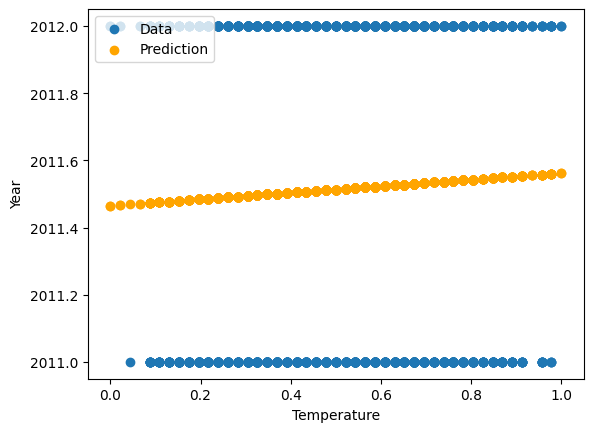

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X1, y, label="Data")
plt.scatter(X1, y_hat_uni, color="orange", label="Prediction")
plt.xlabel("Temperature")
plt.ylabel("Year")
plt.legend()
plt.show()

Multivariate

In [16]:
# Multivariate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred_multi = multi_model.predict(X_test)

print("Coefficients:", multi_model.coef_)
print("Intercept:", multi_model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R^2 Score:", r2_score(y_test, y_pred_multi))


Coefficients: [ 2.69009883e-06 -3.78449866e-03  8.83510025e-03  1.00569167e-01
  5.30449997e-03  4.30421291e-01  2.33221999e-01  5.02689011e-02
 -2.64048916e-01 -6.08188431e-02 -8.18125026e-03 -3.26979770e-02]
Intercept: 2013.1242512731153
MSE: 0.24462228866348515
R^2 Score: 0.019154934165521498


Evaluation Metric

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train univariate regression with 'temp'
X1 = X[['temp']]
X1_train = X_train[['temp']]
X1_test = X_test[['temp']]

uni_model = LinearRegression()
uni_model.fit(X1_train, y_train)

# Predictions
y_pred_uni = uni_model.predict(X1_test)

# Evaluation
mae_uni = mean_absolute_error(y_test, y_pred_uni)
mse_uni = mean_squared_error(y_test, y_pred_uni)
rmse_uni = np.sqrt(mse_uni)
r2_uni = r2_score(y_test, y_pred_uni)

print("Univariate Regression Metrics:")
print("MAE:", mae_uni)
print("MSE:", mse_uni)
print("RMSE:", rmse_uni)
print("R^2:", r2_uni)


Univariate Regression Metrics:
MAE: 0.4982084246696836
MSE: 0.24880996720350615
RMSE: 0.49880854764479143
R^2: 0.0023638892622870333


In [18]:
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predictions
y_pred_multi = multi_model.predict(X_test)

# Evaluation
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("\nMultivariate Regression Metrics:")
print("MAE:", mae_multi)
print("MSE:", mse_multi)
print("RMSE:", rmse_multi)
print("R^2:", r2_multi)



Multivariate Regression Metrics:
MAE: 0.4904074148847104
MSE: 0.24462228866348515
RMSE: 0.4945930535940483
R^2: 0.019154934165521498


Comparison Table

In [19]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Univariate", "Multivariate"],
    "MAE": [mae_uni, mae_multi],
    "MSE": [mse_uni, mse_multi],
    "RMSE": [rmse_uni, rmse_multi],
    "R^2": [r2_uni, r2_multi]
})

print(results)


          Model       MAE       MSE      RMSE       R^2
0    Univariate  0.498208  0.248810  0.498809  0.002364
1  Multivariate  0.490407  0.244622  0.494593  0.019155


Model Interpretability

In [20]:
model.coef_

array([0.09707447])

([0], [Text(0, 0, 'index')])

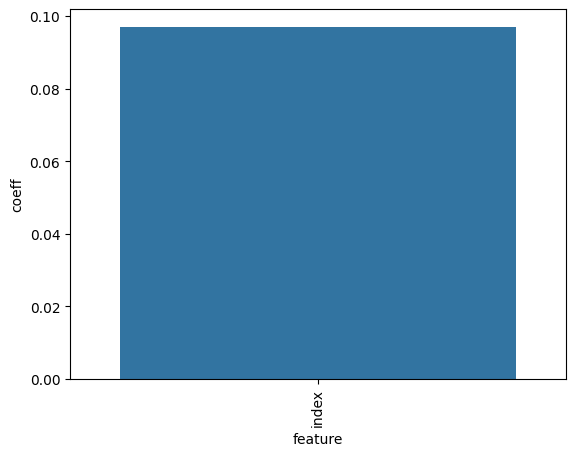

In [21]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [22]:
X_test.columns[np.argmax(np.abs(model.coef_))]

'index'

In [23]:
X_test.columns[np.argmin(np.abs(model.coef_))]

'index'

Linear Regression

In [24]:
import numpy as np
class LinearRegression() :
  def __init__(self, learning_rate=0.01, iterations=5):
    self.learning_rate = learning_rate
    self.iterations = iterations

In [25]:
def predict(self, X):
  return np.dot(X, self.W)+self.b

LinearRegression.predict=predict

In [26]:
def r2_score(self, X, y):
  y_ = self.predict(X)
  ss_res = np.sum((y-y_)**2)
  ss_tot = np.sum((y- y.mean())**2)
  score = (1- ss_res/ss_tot)
  return score

LinearRegression.score=r2_score

Optimization

In [27]:
def update_weights(self):
  Y_pred = self.predict( self.X )
  # calculate gradients
  dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
  db = - 2*np.sum(self.Y - Y_pred)/self.m
  # print(self.X.shape, (self.Y-Y_pred).shape, dW.shape)
  # update weights
  self.W = self.W - self.learning_rate * dW
  self.b = self.b - self.learning_rate * db
  return self

LinearRegression.update_weights=update_weights

In [28]:
def fit(self, X, Y):
  # no_of_training_examples, no_of_features
  self.m, self.d = X.shape
  # weight initialization
  self.W = np.zeros(self.d)
  self.b = 0
  self.X = X
  self.Y = Y
  self.error_list=[]
  # gradient descent learning
  for i in range(self.iterations):
    self.update_weights()
    Y_pred=X.dot(self.W)+self.b
    error=np.square(np.subtract(Y,Y_pred)).mean()
    self.error_list.append(error)
  return self

LinearRegression.fit=fit

Our Data

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown  11EdIivzJq58u-4iP--p0vNqGZg8oLDPS

Downloading...
From: https://drive.google.com/uc?id=11EdIivzJq58u-4iP--p0vNqGZg8oLDPS
To: /content/bike_sharing.csv
100% 142k/142k [00:00<00:00, 79.2MB/s]


In [30]:
df = pd.read_csv('bike_sharing.csv', header=None, skiprows=2)
df.columns = ['index', 'year', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
display(df.head())

,index,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1.0,2012,21,3,0,0,1,29.52,34.850,79,6.0032
1,2.0,2012,3,2,0,0,1,23.78,27.275,83,0.0000
2,6.0,2011,10,1,0,1,3,16.40,20.455,0,11.0014
3,14.0,2012,19,1,0,1,1,13.94,15.150,46,19.9995
4,17.0,2011,23,3,0,1,2,26.24,30.305,73,11.0014


In [31]:
# define X and y
X = df.drop('temp', axis=1)
y = df["temp"]

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=1
)

In [33]:
lr = LinearRegression(iterations=100)
lr.fit(X_train, y_train)

In [34]:
lr.predict(X_test)

array([21.80076453, 14.24131333, 20.8436436 , 18.20949954, 20.8684728 ,
       12.93429716, 21.59580247, 18.9765123 , 20.15829723, 14.49752833,
       20.28723348, 16.52490799, 26.64266262,  3.95498498, 21.13442586,
       28.15174161,  9.15537128, 15.59663092, 20.4848151 , 21.40220062,
       21.62486201,  7.68656255, 15.1917346 , 26.49374352, 26.37956537,
       17.45387104,  9.50319631, 25.88773438, 22.36127497, 20.9501433 ,
       30.23002525, 13.76218586, 25.45878718, 10.55842261, 20.346492  ,
       10.87739216, 20.79545207, 14.96884588, 25.28397324, 17.59703256,
       18.04512801, 23.70172193,  8.85175283, 25.48607784, 19.91940347,
        4.93483999, 10.59327729, 21.02744812, 22.40926029,  8.66900134,
       14.93703585, 10.2242901 , 19.94453463, 13.38772776, 16.17983092,
       12.366953  , 26.07921756, 15.25670819,  6.86748862, 23.61864787,
       18.72723031, 27.91223956, 10.78146271, 25.24535666,  3.19080617,
       16.88568272, 10.81121648, 25.00822524, 14.45791897, 19.45

In [35]:
lr.score(X_train, y_train)

np.float64(0.8314787620561899)

In [36]:
lr.score(X_test, y_test)

np.float64(0.8022066164414221)

In [37]:
lr.W

array([ 6.85120181e-02,  4.11135888e-02,  2.91329307e-01,  6.25412445e-01,
        3.32755577e-03, -7.46275865e-02, -4.28244679e-02,  6.36380136e+00,
       -2.90498053e-01,  1.30473506e-01])

In [38]:
lr.b

np.float64(17.436416463733156)

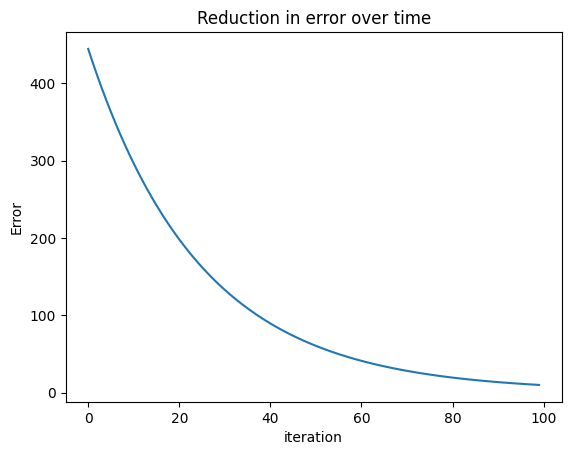

In [39]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

In [40]:
y_hat = lr.predict(X_test)
Adj_R = 1 - (1-lr.score(X_test, y_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R-squared:", Adj_R )

Adjusted R-squared: 0.8106687115515636


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

!gdown 11EdIivzJq58u-4iP--p0vNqGZg8oLDPS

Downloading...
From: https://drive.google.com/uc?id=11EdIivzJq58u-4iP--p0vNqGZg8oLDPS
To: /content/bike_sharing.csv
100% 142k/142k [00:00<00:00, 69.1MB/s]


In [42]:
df = pd.read_csv('bike_sharing.csv', header=None, skiprows=2)
df.columns = ['index', 'year', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
display(df.head())

,index,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1.0,2012,21,3,0,0,1,29.52,34.850,79,6.0032
1,2.0,2012,3,2,0,0,1,23.78,27.275,83,0.0000
2,6.0,2011,10,1,0,1,3,16.40,20.455,0,11.0014
3,14.0,2012,19,1,0,1,1,13.94,15.150,46,19.9995
4,17.0,2011,23,3,0,1,2,26.24,30.305,73,11.0014


In [43]:
y=df[['temp']]
X=df.drop('temp', axis=1)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [45]:
y_train = np.array(y_train)

In [46]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     8127.
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:06:32   Log-Likelihood:                -4381.1
No. Observations:                2556   AIC:                             8784.
Df Residuals:                    2545   BIC:                             8848.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -82.9968    107.908     -0.769      0.4

In [47]:
results.predict(X_sm)

,0
111,29.361175
1787,13.859717
1431,25.123935
2175,13.863988
148,17.574375
...,...
2514,4.890006
2347,29.660045
1608,14.970181
2541,22.964519


In [48]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('temp')]
y = df["temp"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     8127.
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:06:38   Log-Likelihood:                -4381.1
No. Observations:                2556   AIC:                             8784.
Df Residuals:                    2545   BIC:                             8848.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0932      0.027    754.633      0.0

Multicollinearity and implementation

In [49]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,humidity,1.51
6,weather,1.26
9,windspeed,1.14
3,season,1.13
2,hour,1.11
7,atemp,1.11
5,workingday,1.07
4,holiday,1.07
1,year,1.01
0,index,1.01


Removing the variable with highest VIF

In [51]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     8999.
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:06:45   Log-Likelihood:                -4385.8
No. Observations:                2556   AIC:                             8792.
Df Residuals:                    2546   BIC:                             8850.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0932      0.027    753.376      0.0

Let's now keep on removing features till we

either have a feature with vif<5
or

have the model's adj. r2 score go below 0.85

In [52]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features    atemp
VIF          1.11
Name: 4, dtype: object
Current adj.R2 0.09375923795949603
Features removed: 1
List of features removed: ['year']


In [53]:
print(vif)
print(sm_model.summary())

     Features   VIF
4       atemp  1.11
2      season  1.09
6     holiday  1.07
5  workingday  1.07
3        hour  1.04
1   windspeed  1.04
7        year  1.01
8       index  1.01
0     weather  1.00
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     34.04
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           2.08e-51
Time:                        08:06:56   Log-Likelihood:                -8717.1
No. Observations:                2556   AIC:                         1.745e+04
Df Residuals:                    2547   BIC:                         1.750e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
          

error distribution

In [54]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [55]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

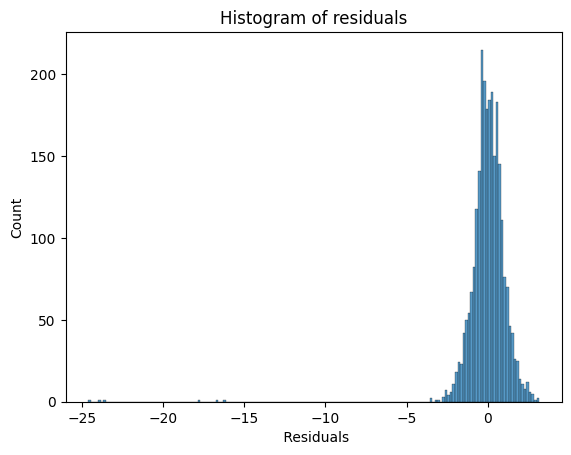

In [56]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

normality test to check if the distribution is actually normal.

In [57]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic

np.float64(0.5846930282212441)

Heteroskedasticity should not exist

In [58]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

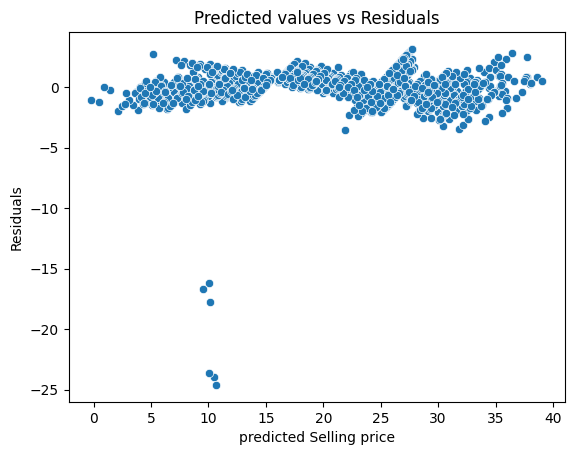

In [59]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

Using Goldfeld Quandt Test to check homoskedacity

In [60]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X2_sm)
lzip(name, test)

[('F statistic', np.float64(1.0033675474618489)),
 ('p-value', np.float64(0.4761301691119591))]

No Autocorrelation

Polynomial Regression

In [61]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect

0.9345996128366808


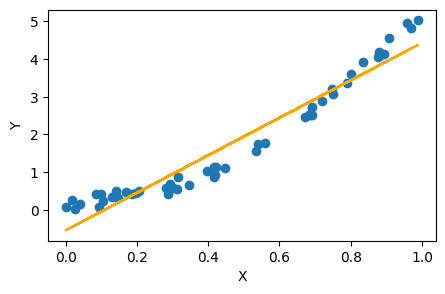

In [62]:

from sklearn.linear_model import LinearRegression



model = LinearRegression()
model.fit(X, y)

output = model.predict(X)

print(model.score(X,y))

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.plot(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



Polynomial Regression Code

In [63]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [64]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

Adj. R-square: 0.9947910474710182


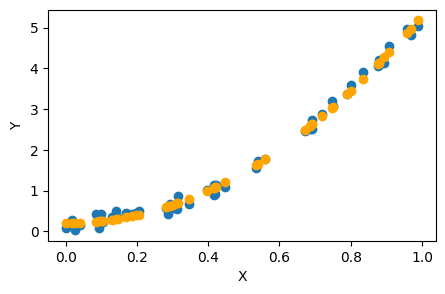

In [65]:
#adding new feature X^2
X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)


print('Adj. R-square:', adj_r(r2_score(y,output),X,y ) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


But are we sure that degree=2 will be best? What about higher degrees?

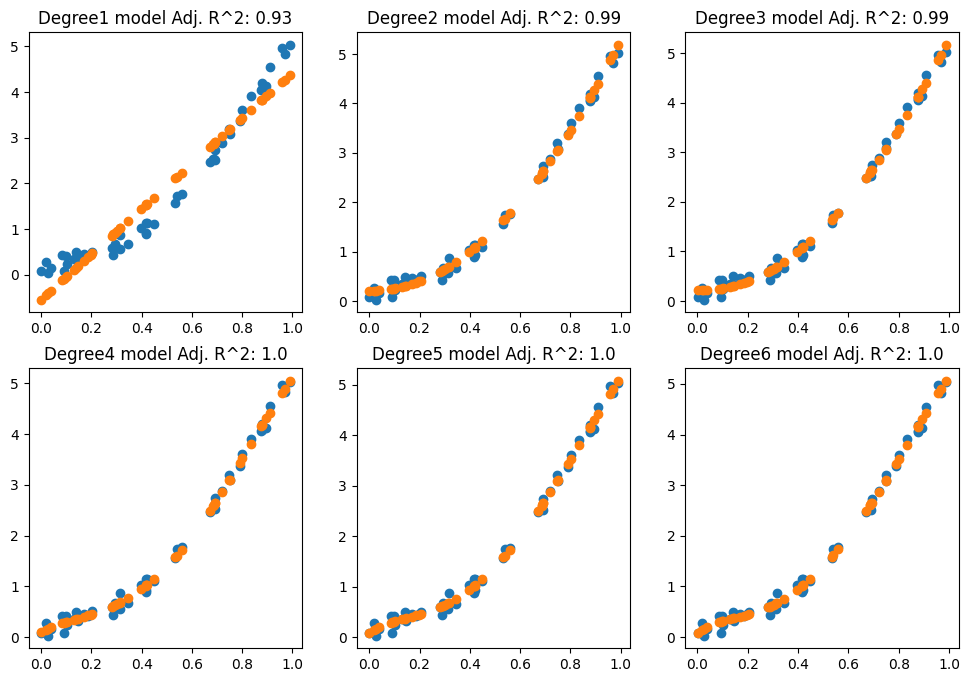

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 6, and seeing performance of the model

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
j = 0
for i in range(1, 7):

    #creates polynomial feature
    poly = PolynomialFeatures(i)

    X_poly = poly.fit_transform(X)
    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting

    axes[j,(i-1)%3].scatter(X, y, label="samples")
    axes[j,(i-1)%3].scatter(X, output, label="prediction")
    axes[j,(i-1)%3].set_title(f'Degree{i} model Adj. R^2: {round(adj_r(r2_score(y,output),X_poly_scaled,y ),2)}')

    if(i==3):
      j=1

Underfitting Overfitting Code

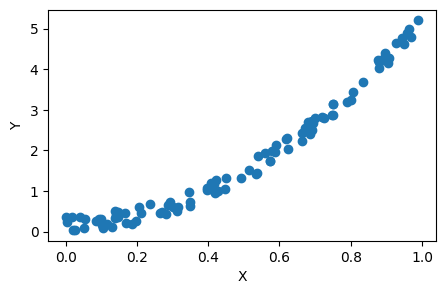

In [67]:
# lets first generate a dataset of 100 points this time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [68]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degrees = 100 # number of data-points
train_scores = []
test_scores = []

train_loss = []
test_loss = []

scaler = StandardScaler()

for degree in range(1, degrees):

    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)

    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)

    train_scores.append(adj_r(train_score,X_train,y_train))
    test_scores.append(adj_r(test_score,X_test,y_test))

    output1 = polyreg_scaled.predict(X_train)
    output2 = polyreg_scaled.predict(X_test)

    train_loss.append(mean_squared_error(y_train,output1))
    test_loss.append(mean_squared_error(y_test,output2))


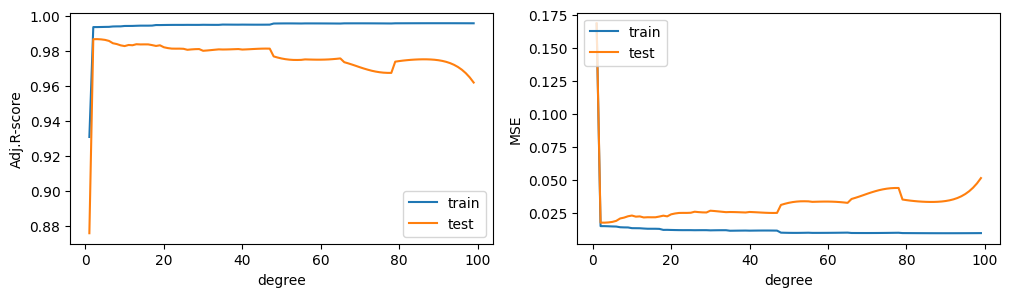

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(list(range(1, 100)), train_scores, label="train")
axes[0].plot(list(range(1, 100)), test_scores, label="test")
axes[0].legend(loc='lower right')
axes[0].set_xlabel("degree")
axes[0].set_ylabel("Adj.R-score")

axes[1].plot(list(range(1, 100)), train_loss, label="train")
axes[1].plot(list(range(1, 100)), test_loss, label="test")
axes[1].legend(loc='upper left')
axes[1].set_xlabel("degree")
axes[1].set_ylabel("MSE")

plt.show()

Bias-Variance Tradeoff

In [71]:
from sklearn import datasets

data = datasets.load_diabetes()

In [72]:
X = data['data']

y = data['target']

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.preprocessing import PolynomialFeatures

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
degree = 25   # careful: very high degree can cause overfitting/instability
poly = PolynomialFeatures(degree=2)  # safe, manageable


X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [78]:
# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

Using Sklearn's Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
model = LinearRegression()
model.fit(X_train_poly , y_train)

output = model.predict(X_test_poly)


taking MSE as metric instead of Adj.R-sq

In [81]:
from sklearn.metrics import mean_squared_error

print('MSE for test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly)
print('MSE for train:', mean_squared_error(y_train, output))

MSE for test: 3096.02830734427
MSE for train: 2393.138618059784


how L1 and L2 regularisation work

In [82]:
from sklearn.linear_model import Lasso, Ridge

In [83]:
lasso_model = Lasso(alpha=0.01)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=1.0)    # Alpha is the regularization strength

In [84]:
# Fit the models to the training data
lasso_model.fit(X_train_poly, y_train)
ridge_model.fit(X_train_poly, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.743e+04, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


Ridge()

In [85]:
lasso_predictions = lasso_model.predict(X_test_poly)
ridge_predictions = ridge_model.predict(X_test_poly)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

test MSE for L1: 3062.6271424851725
test MSE for L2: 2883.3630286745474


to create X and Y

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)

#0.8, 0.2 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [88]:
def adj_r2(X, y, r2_score):
  return 1 - ((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)

In [89]:
train_scores = []
test_scores = []
rate_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
scaler = StandardScaler()
for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(10), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score= polyreg_scaled.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

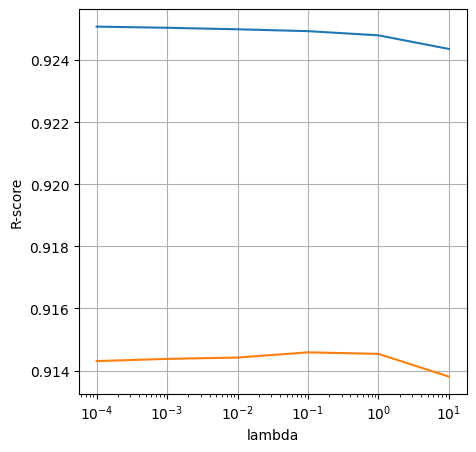

In [90]:
plt.figure(figsize=(5,5))
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="test")
plt.xlabel("lambda")
plt.ylabel("R-score")
plt.xscale("log")
plt.grid()
plt.show()

In [91]:
print("Best lambda:", rate_list[np.argmax(test_scores)])

Best lambda: 0.1


Cross-Validation

In [92]:
# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)


divide our data into train, test and validation

In [93]:
#0.6, 0.2, 0.2 split
from sklearn.model_selection import train_test_split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [94]:
X_train.shape, X_val.shape, X_test.shape

((600, 1), (200, 1), (200, 1))

 visualize our data

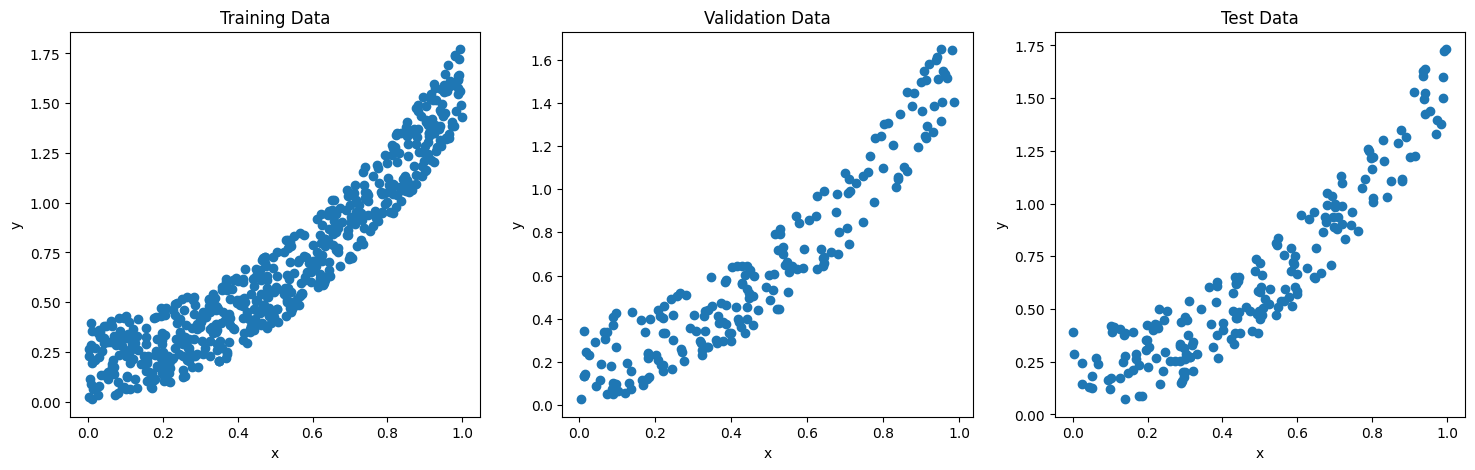

In [95]:
plt.figure(figsize=(18,5))
data_labels = ["Training Data", "Validation Data", "Test Data" ]
x_labels = [X_train, X_val, X_test]
y_labels = [y_train, y_val, y_test]
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.scatter(x_labels[i], y_labels[i])
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(data_labels[i])

 optimal value of degree for our polynomial regression model

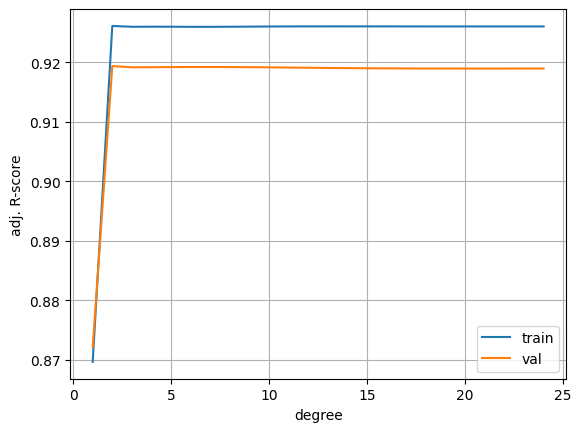

In [96]:
# Same as we did earlier and in the last lecture
max_degree = 25 # max polynomial degree
train_scores = []
val_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
  polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
  train_scores.append(train_score)
  val_scores.append(val_score)
plt.figure()
plt.plot(list(range(1, 25)), train_scores, label="train")
plt.plot(list(range(1, 25)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

Taking degree=3, we now find the best regularization rate by the same process

In [97]:
train_scores = []
val_scores = []
rate_list = [0.01, 0.1, 1,5, 10]
for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

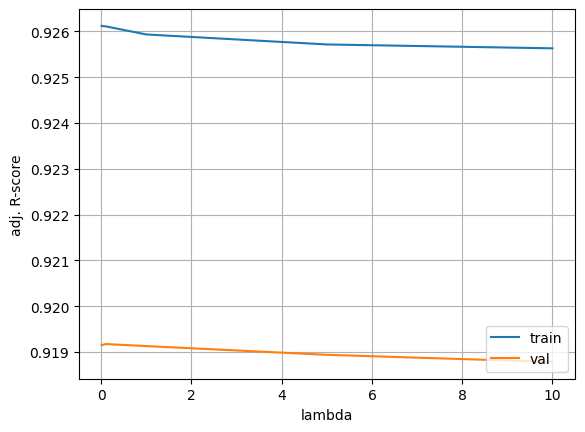

In [98]:
plt.figure()
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

optimal value of lambda as 0.01

In [99]:
polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=0.01))
polyreg_scaled.fit(X_train, y_train)
train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
print(f'Training Score = {train_score}')
val_score = adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
print(f'Validation Score = {val_score}')

Training Score = 0.9261212571628987
Validation Score = 0.9191482611247953


In [100]:
# Reporting this as the final score
test_score = adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
print(f'Testing Score = {test_score}')

Testing Score = 0.9143625261065258


K-Fold Cross Validation

In [101]:
# Creating a small dataset of 100 data points
np.random.seed(2)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

In [102]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [103]:
# Performing k-fold cross validation
degrees = 15 # number of degrees
train_scores = []
val_scores = []

for degree in range(1, degrees):
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X): #iterating through the K-folds

        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train) #training model

        train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
        val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

        fold_train_scores.append(train_score)
        fold_val_scores.append(val_score)

    train_score = np.mean(fold_train_scores)
    val_score = np.mean(fold_val_scores)

    train_scores.append(train_score)
    val_scores.append(val_score)

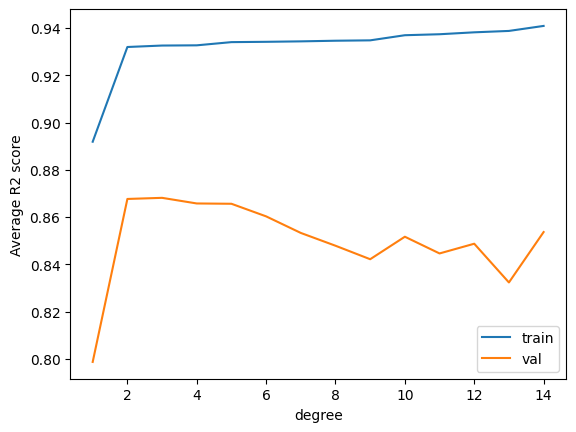

In [104]:
plt.figure()
plt.plot(list(range(1, 15)), train_scores, label="train")
plt.plot(list(range(1, 15)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("Average R2 score")
plt.show()

Introduction to AT&T Churn UseCase

In [105]:
!gdown 1EnrJwOL7A4nZsptCPc3bx-aCmWgc8KTZ

Downloading...
From: https://drive.google.com/uc?id=1EnrJwOL7A4nZsptCPc3bx-aCmWgc8KTZ
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 98.0MB/s]


In [106]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [107]:
churn['Churn'].value_counts()

,count
Churn,
0,2850
1,2850


Intro to Logistic Regression

 sigmoid function

In [108]:
def sigmoid(x):
    return 1/(1+np.e**-x)

In [109]:
sigmoid(1.99)

0.8797431375322491

In [110]:
sigmoid(0)

0.5

In [111]:
sigmoid(-0.9)

0.28905049737499605

Visualizing sigmoid

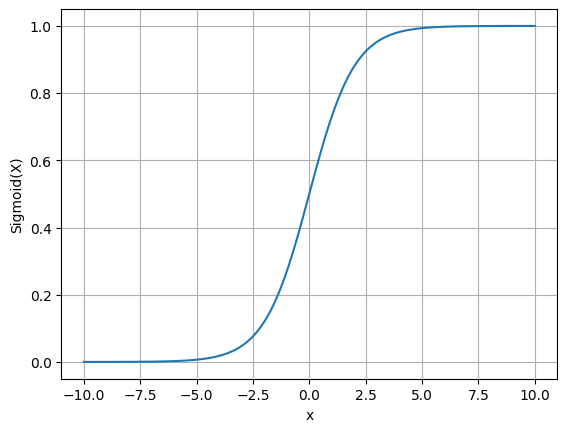

In [112]:
x = np.linspace(-10, 10, 100) # 100 equidistant points between -10 and 10
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

In [113]:
# Loss for a single point
def log_loss(y, y_hat):
  loss = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -loss

In [114]:
# Case 1, yi=1, high pi
log_loss(1, 0.99)

np.float64(0.01005033585350145)

In [115]:
# Case 2, yi = 1, pi =0.5

log_loss(1, 0.5)

np.float64(0.6931471805599453)

In [116]:
# Case 3, yi = 1, low pi

log_loss(1, 0.1)

np.float64(2.3025850929940455)

Optimization

 Sklearn Implementation of Logistic regression

In [117]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

In [118]:
!gdown 1EnrJwOL7A4nZsptCPc3bx-aCmWgc8KTZ

Downloading...
From: https://drive.google.com/uc?id=1EnrJwOL7A4nZsptCPc3bx-aCmWgc8KTZ
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 14.8MB/s]


In [119]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [120]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
X = churn[cols]
X.shape

(5700, 5)

In [121]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape

(3420, 5)

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [123]:
X_train

array([[-1.8525591 , -0.54121117,  1.87596728,  0.0724823 ,  2.13378709],
       [ 0.93155078,  1.05292599,  0.39854651, -0.54879454, -0.81991418],
       [ 0.46912157,  0.11462924,  1.13324217,  0.0724823 , -2.27130187],
       ...,
       [-0.52565742, -0.04014136, -0.68543069,  0.69375914,  0.55508469],
       [-0.94359172, -0.58957698, -0.37428909,  1.93631281, -0.36158122],
       [-0.58604336,  2.40910335,  1.70935597,  0.69375914, -0.25972945]])

In [124]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [125]:
model.coef_

array([[0.68445262, 0.29104301, 0.1363756 , 0.79630985, 0.06125924]])

In [126]:
model.intercept_

array([-0.01220319])

In [127]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 1, 1])

Accuracy Metric

In [128]:
def accuracy(y_true, y_pred):
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [129]:
accuracy(y_train, model.predict(X_train))

np.float64(0.7058479532163743)

In [130]:
accuracy(y_val, model.predict(X_val))

np.float64(0.6982456140350877)

Hyperparameter tuning

In [131]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = accuracy(y_train, scaled_lr.predict(X_train))
  val_score = accuracy(y_val, scaled_lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

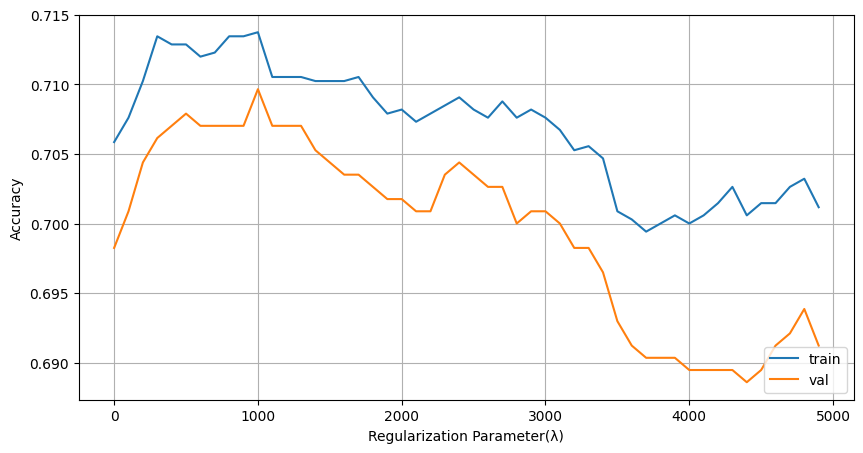

In [132]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [133]:
model = LogisticRegression(C=1/1000)
model.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [134]:
accuracy(y_train, model.predict(X_train))

np.float64(0.7137426900584796)

In [135]:
accuracy(y_val, model.predict(X_val))

np.float64(0.7096491228070175)

In [136]:
accuracy(y_test, model.predict(X_test))

np.float64(0.7096491228070175)

Sklearn Code implementation for MultiClass Classification

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.inspection import DecisionBoundaryDisplay

In [138]:
# dataset creation with 3 classes
from sklearn.datasets import make_classification

X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
y=y.reshape(len(y), 1)

print(X.shape, y.shape)

(498, 2) (498, 1)


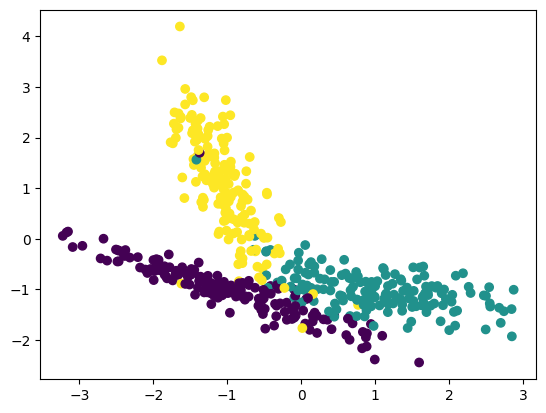

In [139]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


In [140]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(298, 2)

In [141]:
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [142]:
print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')

Training Accuracy:0.9161073825503355
Validation Accuracy :0.91
Test Accuracy:0.91


In [143]:
X

array([[-1.06046348e+00, -9.46151693e-01],
       [-1.07328735e+00,  1.12579697e+00],
       [-1.30251507e+00,  1.27609317e+00],
       [-9.82024695e-01, -1.41943709e-02],
       [ 1.10608927e+00, -5.78336994e-01],
       [ 1.68740640e-01, -1.23179638e+00],
       [-1.10643431e+00, -9.73680424e-01],
       [ 4.23058277e-02, -1.01173227e+00],
       [-1.27793724e+00, -8.24138962e-01],
       [-9.65763076e-01, -9.58893538e-01],
       [-7.24877888e-01,  7.74568331e-01],
       [ 3.94484197e-01, -1.02280544e+00],
       [-1.42880776e+00,  2.27597716e+00],
       [-1.48473818e+00, -5.97862989e-01],
       [-5.06213921e-01, -1.17932620e+00],
       [ 3.16059359e-01, -8.01995782e-01],
       [-5.24452044e-01, -5.90589105e-01],
       [-1.07565483e+00,  1.19021951e+00],
       [ 1.66390609e+00, -7.30037480e-01],
       [ 6.58706788e-01, -1.52760674e+00],
       [ 9.19890507e-01, -1.18593296e+00],
       [-1.24549170e+00,  1.62332518e+00],
       [-1.00278261e+00,  1.35164489e+00],
       [ 1.

/tmp/ipython-input-2755768280.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


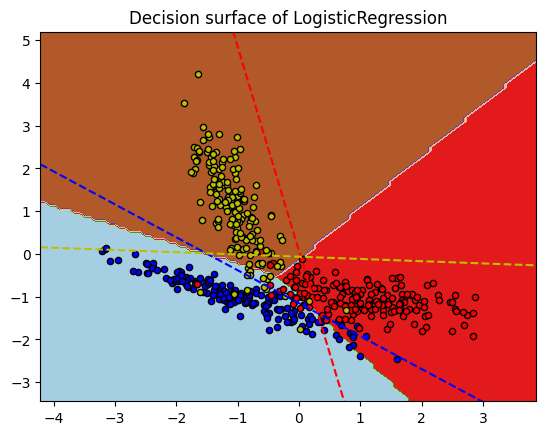

In [144]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Confusion Matrix Code

In [146]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[36,  3,  0],
       [ 4, 28,  0],
       [ 1,  1, 27]])

In [147]:
from matplotlib import pyplot as plt

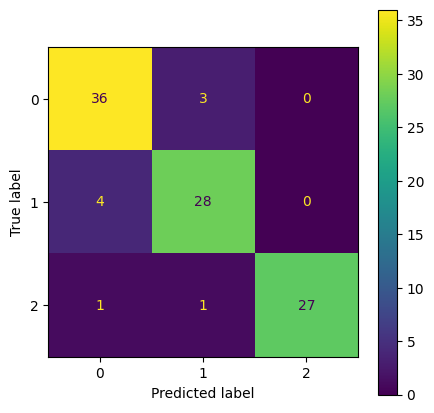

In [148]:
# ax used here to control the size of confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [149]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

np.float64(0.91)

Precision Code

In [150]:
def precision_calc(conf):
  tp = conf[1,1]
  fp = conf[0,1]

  return tp/(tp+fp)

In [151]:
precision_calc(conf_matrix)

np.float64(0.9032258064516129)

Recall Code

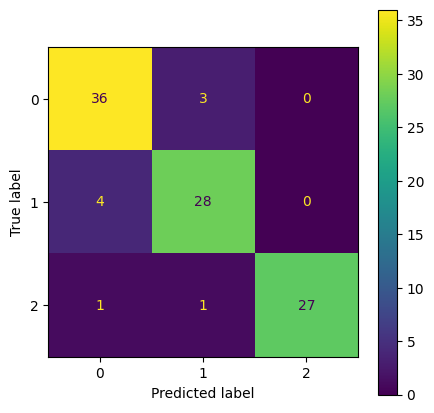

In [152]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [153]:
def recall_calc(conf):
  tp = conf[1,1]
  fn = conf[1,0]

  return tp/(tp+fn)

In [154]:
recall_calc(conf_matrix)

np.float64(0.875)

F1-Score

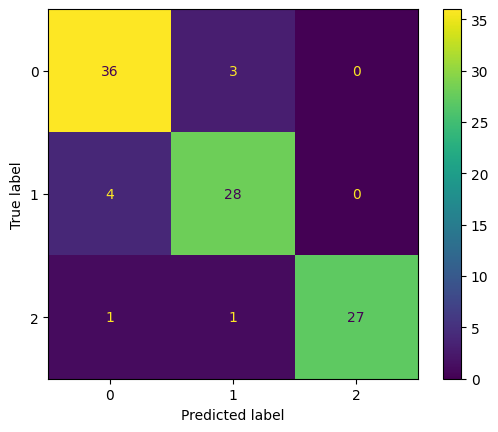

In [155]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [156]:
pre = precision_calc(conf_matrix)
re = precision_calc(conf_matrix)

f1 = 2* (pre*re)/(pre+re+1e-6)

print(f'f1Score:{f1}')

f1Score:0.9032253064518897


In [157]:
from sklearn.metrics import f1_score

Spam vs Non-Spam: Business Case

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 148MB/s]


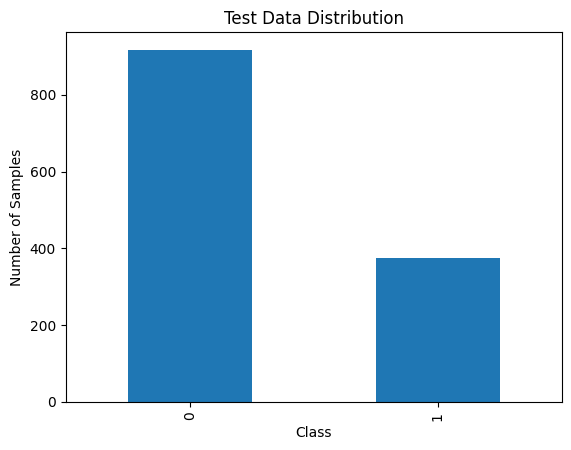

Training Data:(3878, 15),(3878,), Testing Data: (1293, 15),(1293,)


LogisticRegression()

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

dt = pd.read_csv('Spam_finalData.csv')




X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()


print(f'Training Data:{X_train.shape},{y_train.shape}, Testing Data: {X_test.shape},{y_test.shape}')





model = LogisticRegression()
model.fit(X_train,y_train)


In [160]:
AU-ROC curve Code

SyntaxError: invalid syntax (ipython-input-1990190959.py, line 1)

In [161]:
from sklearn.metrics import roc_curve, roc_auc_score


In [162]:
probability = model.predict_proba(X_test)

In [163]:
probability

array([[0.81355688, 0.18644312],
       [0.79046963, 0.20953037],
       [0.99688878, 0.00311122],
       ...,
       [0.86105765, 0.13894235],
       [0.96394122, 0.03605878],
       [0.25390506, 0.74609494]])

In [164]:
probabilites = probability[:,1]

In [165]:
fpr, tpr, thr = roc_curve(y_test,probabilites)

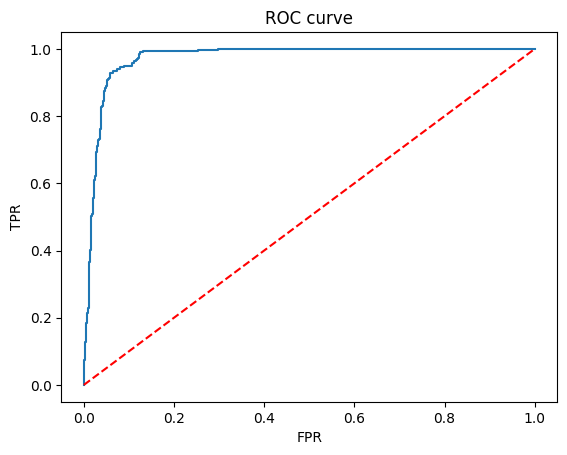

In [166]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [167]:
# AUC
roc_auc_score(y_test,probabilites)

np.float64(0.9730040140142463)

Precision Recall curve

In [168]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [169]:
precision, recall, thr = precision_recall_curve(y_test, probabilites)

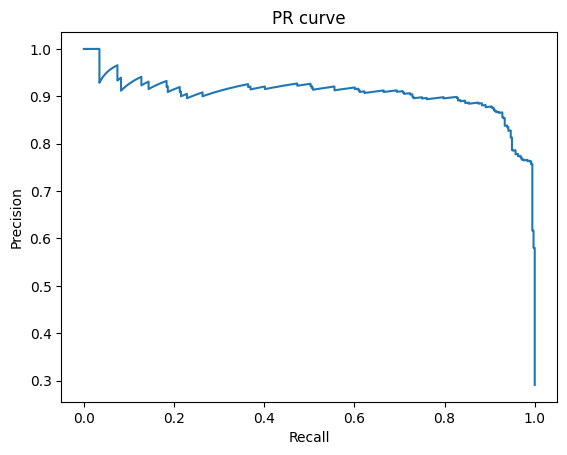

In [ ]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [170]:
auc(recall, precision)

np.float64(0.9053102165377275)

Class weight Code

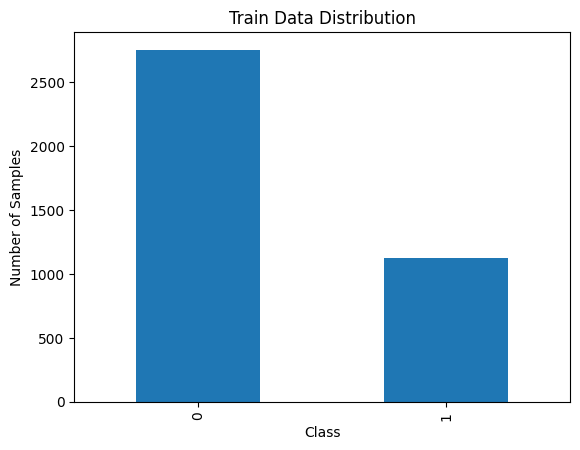

In [171]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

In [172]:
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)

  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)

  train_score = f1_score(y_train, train_y_pred)
  test_score = f1_score(y_test, test_y_pred)

  return train_score,test_score


In [173]:
# minority class needs more re-weighting


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(class_weight={0:1,1:2.37})

f1_train,f1_test = training(model,X_train,y_train,X_test,y_test)
print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Training F1 score:0.8444613050075872, Testing F1 score:0.8548571428571429


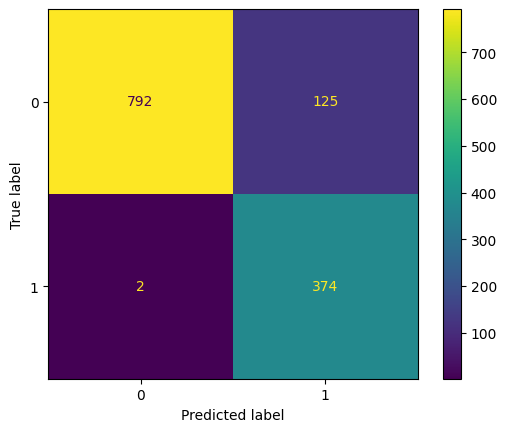

In [174]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

Oversampling code

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler()

# Perform oversampling on the training data
print('Before Oversampling')
print(y_train.value_counts())
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression()

f1_train,f1_test = training(model,X_train_oversampled, y_train_oversampled,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before Oversampling
label_num
0    2755
1    1123
Name: count, dtype: int64
After Oversampling
label_num
0    2755
1    2755
Name: count, dtype: int64
Training F1 score:0.9279538904899135, Testing F1 score:0.8529076396807298


SMOTE (Synthetically Minority Oversampling Technique)

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()


# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression(C= 5, penalty= 'l1', solver = 'liblinear')

f1_train,f1_test = training(model,X_sm, y_sm,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')



Before SMOTE
label_num
0    2755
1    1123
Name: count, dtype: int64
After Oversampling
label_num
0    2755
1    2755
Name: count, dtype: int64
Training F1 score:0.9553398058252427, Testing F1 score:0.9126691266912669
